# Hiperplokštumomis grįsti klasifikatoriai

- Klasifikacijos uždavinio tikslas yra priskirti duomenų taškus vienai iš kelių galimų kategorijų. Skirtingai nuo regresijos, klasifikacijoje siekiama prognozuoti diskrečią reikšmę – klasės žymę (angl. label, target).

- Klasifikavimo uždavinyje hipotezes įprasta vadinti *klasifikatoriais*. 

- Pradėsime nuo paprastesnių klasifikavimo uždavinių, kuomet klasių yra *dvi* (angl. binary classification).

- *k-mate hiperplokštuma* vadiname aibės $\mathbb{R}^k$ taškų poaibį $H(v, b) = \{ \textbf{x} \in \mathbb{R}^k \mid \textbf{x} \cdot v + b = 0 \}$, kur $v = (v_1, v_2, ..., v_k)^T \in \mathbb{R}^k$, $b \in \mathbb{R}$ – fiksuoti dydžiai, nusakantys hiperplokštumą. Pvz., dvimatėje erdvėje ši aibė būtų tiesė, trimatėje – plokštuma.

- Paprasčiausi klasifikatorių modeliai gaunami bandant atskirti taškus $H(v, b)$ puserdviais $H^{+}(v, b) = \{ \textbf{x} \in \mathbb{R}^k \mid \textbf{x} \cdot v + b \geq 0 \}$ ir $\mathbb{R}^k \setminus H^{+}(v, b)$, atitinkamai. Parametrų rinkinį $(v, b)$ kartais žymėsime $ w = (v, b) \in \mathbb{R}^{k+1}$.

- Klasių aibė žymėsime $\mathcal{Y} = \{-1, 1\}$. Tokiu atveju, hipotezė yra laiptinė funkcija, užrašoma:

$$
h_w(\textbf{x}) = \begin{cases} 1, \text{ kai } \textbf{x} \in H^+(w) \cr -1, \text{ kai } \textbf{x} \in \mathbb{R}^k \setminus H^+(w) = \left(H^+(w)\right)^c \end{cases}
$$

- Klasifikavimo uždavinio tikslas – nustatyti optimalius puserdvius, kurie kiek įmanoma gerai atskirtų klases.


## Atraminių vektorių klasifikatorius

- Atraminių vektorių klasifikatorius (angl. support vector machine, SVM) yra labai įdomus ir universalus MM modelis, galintis atlikti tiesinį arba netiesinį klasifikavimą (bei regresiją). SVM ypač gerai tinka sudėtingiems, bet mažiems ar vidutinio dydžio duomenų rinkiniams klasifikuoti.

- Pagrindinė SVM idėja – surasti hiperplokštumą, kuri atskirtų dvi turimas klases. Tačiau erdvėje tokių hiperplokštumų galime nubrėžti be galo daug. SVM modelis parenka optimalią hiperplokštumą siekdamas maksimizuoti paraštę tarp artimiausių skirtingų klasių taškų. Šį algoritmą galime įsivaizduoti kaip plačiausios įmanomos gatvės tarp dviejų klasių suradimą.

- Daugiau apmokymo aibės atvejų, esančių už paraštės ribų, neturės jokios įtakos hiperplokštumos parinkimui – ją visiškai nustato (angl. supports) ruožo pakraštyje esantys atvejai. Šie duomenų atvejai vadinami atraminiais vektoriais.

<hr style="border: none; height: 2px; background-color: black;">

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/support_vector_machines.png" alt="hyperplane-svm" width="65%">
<p><strong>1.6 pav., Hiperplokštumų pavyzdys dvimačiu atveju</strong></p>
</div>

<hr style="border: none; height: 2px; background-color: black;">


- Atvejis, kuomet duomenis galime pilnai atskirti hiperplokštuma, vadinamas *separabiliu*. Formaliai, jis gali būti užrašytas taip:

Atvejis yra separabilus, kuomet egzistuoja hiperplokštuma $H(w), w = (v, b)$, kuria apibrėžiamas klasifikatorius $h_w$ tenkina prielaidą 
$$
\mathbb{P}(y = h_w(\textbf{x})) = 1
$$

- Galiojant šiai prielaidai visada egzistuos optimali hiperplokštuma, atskirianti dvi klases.

Hiperplokštumos paraštė taške $\textbf{x}$ vadinamas dydis $\text{dist}(\textbf{x}, H(w))$. Klasifikatoriaus $h_w$, atitinkančio mokymosi aibę $S = ((\textbf{x}^{(1)}, y^{(1)}), ..., (\textbf{x}^{(n)}, y^{(n)}))$ parašte (angl. margin) vadinamas dydis $d(w) = \min_{1\leq i \leq n} dist(\textbf{x}^{(i)}, H(w))$. Galiausiai, optimali paraštė SVM algoritmu ieškoma siekiant optimizuoti uždavinį:

$$
\max_{\forall i \; y^{(i)}(\textbf{x}^{(i)} \cdot v + b) > 0} d(w) = \max_{\forall i \; y^{(i)}(\textbf{x}^{(i)} \cdot v + b) > 0} \min_{1\leq i \leq n} dist(\textbf{x}^{(i)}, H(w)),
$$

Toks uždavinys gali būti pakeistas iškilos funkcijos minimizavimo uždaviniu, todėl jis gali būti sprendžiamas įprastais minimizavimo metodais, su garantija, jog bus rastas globalus minimumo taškas.

Prielaida, jog duomenys yra separabilūs galioja ne visada. Taigi, pastarasis optimizavimo uždavinys gali neturėti sprendinio. Siekiant apeiti šią problemą, įvedami papildomi laisvi kintamieji $\xi_i \geq 0, i = 1, ..., n$ (angl. slack variables) ir apribojimas optimizavimo uždavinyje keičiamas tokiu: 
$$
\forall i \; y^{(i)}(\textbf{x}^{(i)} \cdot v + b) > 1 - \xi_i
$$

Jei $\xi_i > 0$, tai atitinkamą stebinį vadiname išskirtimi. Atmetus visas išskirtis, redukuota mokymosi aibė bus separabili ir jos taškus jau galima atskirti panaudojant anksčiau paminėtą optimizavimo būdą.

`scikit-learn` tokių kintamųjų parinkimą galima valdyti naudojant $C$ hiperparametrą: mažesnė C reikšmė lemia platesnę paraštę, bet daugiau ribinių pažeidimų. 5-4 pav. parodytos dviejų minkštosios maržos SVM klasifikatorių sprendimo ribos ir maržos netiesiškai atskiriamame duomenų rinkinyje. Kairėje pusėje, naudojant didelę C reikšmę, klasifikatorius padaro mažiau ribinių pažeidimų, bet galiausiai gauna mažesnę ribą. Dešinėje pusėje, naudojant mažą C reikšmę, ribinė reikšmė yra daug didesnė, tačiau daug atvejų atsiduria gatvėje. Tačiau atrodo tikėtina, kad antrasis klasifikatorius geriau apibendrins: iš tikrųjų net ir šioje mokymo aibėje jis padaro mažiau prognozavimo klaidų, nes dauguma ribinių pažeidimų iš tikrųjų yra teisingoje sprendimo ribos pusėje.


<hr style="border: none; height: 2px; background-color: black;">

<div style="text-align: center;">
<img src="https://raw.githubusercontent.com/ugniusalekna/intro-to-ml/main/images/margin-svm.png" alt="margin-svm" width="65%">
<p><strong>1.7 pav., Konstantos C poveikis sprendinio paraštės dydžiui </strong></p>
</div>

<hr style="border: none; height: 2px; background-color: black;">


Jei reikalaujame, kad mūsų modelis  atvejai būtų ne gatvėje ir dešinėje pusėje, tai vadinama kietuoju ribiniu klasifikavimu. Yra dvi pagrindinės problemos, susijusios su griežtuoju ribiniu klasifikavimu. Pirma, jis veikia tik tada, kai duomenys yra tiesiškai atskiriami, ir, antra, jis yra gana jautrus nukrypimams. 5-3 paveiksle parodytas rainelės duomenų rinkinys su vienu papildomu nuokrypiu: kairėje pusėje neįmanoma rasti kietosios ribos, o dešinėje sprendimo riba labai skiriasi nuo tos, kurią matėme 5-1 paveiksle be nuokrypio, ir ji tikriausiai nebus taip gerai apibendrinta.

## Logistinės regresijos klasifikatorius

Atsižvelgiant į binarinio klasifikavimo uždavinį, natūrali ir pati paprasčiausia netikties funkcija galėtų būti $0-1$ indikatorinė funkcija, kuri įgyja reikšmę 0, jei prognozuojama klasifikacija atitinka tikrąją klasę, arba 1, jei prognozuojama klasifikacija neatitinka tikrosios klasės. Ši netikties funkcija užrašoma kaip:

$$
\ell_{0-1}(\textbf{x}, y; w) = \begin{cases} 1, & \text{kai } y \neq h_w(\textbf{x}), \cr 0, & \text{kai } y = h_ (\textbf{x}), \end{cases} = \begin{cases} 1, & \text{kai } -y(\textbf{x} \cdot v + b) \geq 0, \cr 0, & \text{kai } -y (\textbf{x} \cdot v + b) < 0. \end{cases}
$$

Dėja, bet tokia funkcija nėra iškila ir netgi netolydi (kodėl tai problema?). Šią laiptinę funkciją gerai aproksimuoja sigmoidė:

$$
\ell_{0-1}(\textbf{x}, y; w) \approx \frac{1}{1 - e^{-y(\textbf{x} \cdot v + b)}} =: \sigma(-y(\textbf{x} \cdot v + b))
$$


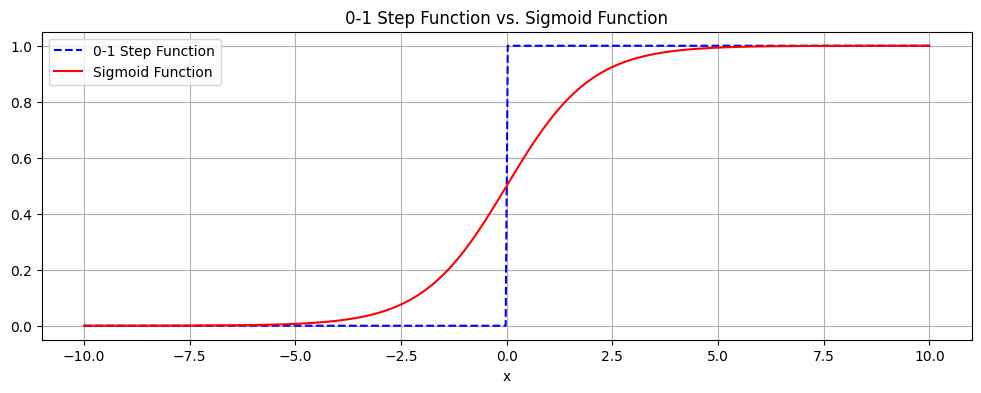

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

x_seq = np.linspace(-10, 10, 400)
step_seq = step_function(x_seq)
sigmoid_seq = sigmoid_function(x_seq)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x_seq, step_seq, label='0-1 Step Function', linestyle='--', color='blue')
ax.plot(x_seq, sigmoid_seq, label='Sigmoid Function', color='red')

ax.set_xlabel('x')
ax.set_title('0-1 Step Function vs. Sigmoid Function')
ax.legend()
ax.grid()
plt.show()